In [1]:
import numpy as np
import nibabel as nib
import glob
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
from tensorflow.keras.utils import to_categorical

In [2]:
train_dataset_path = '/content/drive/MyDrive/Task01_Prostate/'

In [118]:
test_image = nib.load(train_dataset_path + 'imagesTs/007185_img.nii').get_fdata()
test_mask = nib.load(train_dataset_path + 'masksTs/007185_mask.nii').get_fdata()

In [119]:
print(test_image.shape)
print(test_mask.shape)

(150, 150, 58)
(150, 150, 58)


In [5]:
print(test_image.max())
print(test_mask.max())


1.0
8.0


In [120]:
scaler = MinMaxScaler()
test_test_image = scaler.fit_transform(test_image.reshape(-1, test_image.shape[-1])).reshape(test_image.shape)
test_test_mask = test_mask.astype(np.uint8)


In [7]:
print(test_test_image.shape)
print(test_test_mask.shape)


(150, 150, 58)
(150, 150, 58)


In [8]:
print(np.unique(test_test_mask))

[0 1 2 3 4 5 6 7 8]


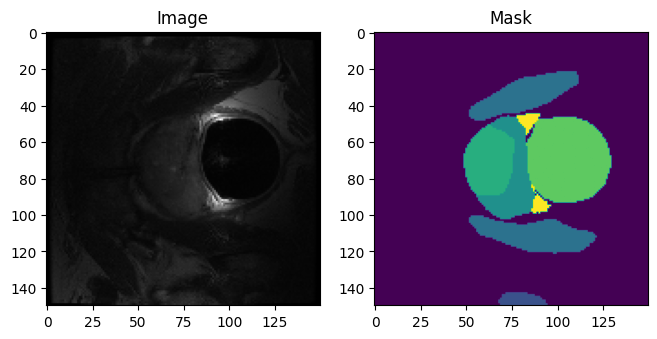

In [123]:
import random
n_slice = random.randint(0, test_test_mask.shape[2])

plt.figure(figsize=(12,8))

plt.subplot(231)
plt.imshow(test_test_image[:,:,n_slice], cmap='gray')
plt.title('Image')
plt.subplot(232)
plt.imshow(test_test_mask[:,:,n_slice], )
plt.title('Mask')
plt.show()


In [ ]:
test_test_image = test_test_image [0:128, 0:128, 0:30]
test_test_mask = test_test_mask [0:128, 0:128, 0:30]



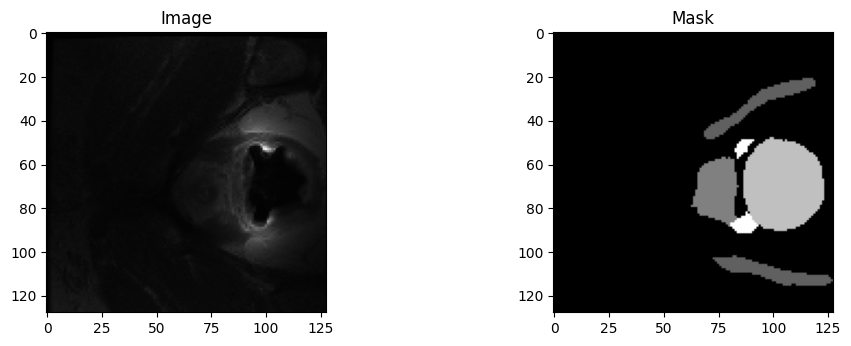

In [ ]:
n_slice = random.randint(0, test_test_mask.shape[2]-1)

plt.figure(figsize=(12,8))

plt.subplot(221)
plt.imshow(test_test_image[:,:,n_slice], cmap='gray')
plt.title('Image')
plt.subplot(222)
plt.imshow(test_test_mask[:,:,n_slice], cmap='gray')
plt.title('Mask')
plt.show()

In [ ]:
np.save('/content/drive/MyDrive/Task01_Prostate/test_test_image.npy', test_test_image)

In [ ]:
my_img = np.load('/content/drive/MyDrive/Task01_Prostate/test_test_image.npy')
print(my_img.shape)
print(test_test_image.shape)

(128, 128, 30)
(128, 128, 30)


In [2]:
image_list = sorted(glob.glob('/content/drive/MyDrive/Task01_Prostate/imagesTs/*.nii'))
mask_list = sorted(glob.glob('/content/drive/MyDrive/Task01_Prostate/masksTs/*.nii'))


In [3]:
len(image_list)

15

In [4]:
  try_mask = nib.load(mask_list[14]).get_fdata()
  try_mask = try_mask.astype(np.uint8)
  print(np.unique(try_mask))

[0 1 2 3 4 5 6 7 8]


In [23]:
 try_mask = to_categorical(try_mask, num_classes=9)

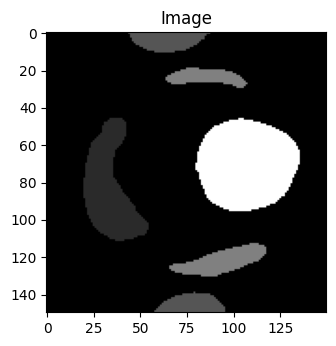

In [14]:
import random
n_slice = random.randint(0, test_mask.shape[2]-1)

plt.figure(figsize=(12,8))

plt.subplot(221)
plt.imshow(try_mask[:,:,n_slice], cmap='gray')
plt.title('Image')

plt.show()

In [7]:
for img in range(len(image_list)):
  print('Now preparing image and masks number:',img)

  temp_image = nib.load(image_list[img]).get_fdata()
  temp_image = scaler.fit_transform(temp_image.reshape(-1, temp_image.shape[-1])).reshape(temp_image.shape)

  temp_mask = nib.load(mask_list[img]).get_fdata()
  temp_mask = temp_mask.astype(np.uint8)

  temp_image = temp_image [0:128, 0:128, 0:32]

  temp_mask = temp_mask [0:128, 0:128, 0:32]
  temp_mask = to_categorical(temp_mask, num_classes=9)

  np.save('/content/drive/MyDrive/Task01_Prostate/saya/images/image_'+str(img)+'.npy', temp_image)
  np.save('/content/drive/MyDrive/Task01_Prostate/saya/mask/mask_'+str(img)+'.npy', temp_mask)



Now preparing image and masks number: 0
Now preparing image and masks number: 1
Now preparing image and masks number: 2
Now preparing image and masks number: 3
Now preparing image and masks number: 4
Now preparing image and masks number: 5
Now preparing image and masks number: 6
Now preparing image and masks number: 7
Now preparing image and masks number: 8
Now preparing image and masks number: 9
Now preparing image and masks number: 10
Now preparing image and masks number: 11
Now preparing image and masks number: 12
Now preparing image and masks number: 13
Now preparing image and masks number: 14


In [8]:
gambar = np.load('/content/drive/MyDrive/Task01_Prostate/saya/images/image_2.npy')
topeng = np.load('/content/drive/MyDrive/Task01_Prostate/saya/mask/mask_2.npy')

In [96]:
print(np.unique(topeng))

[0. 1.]


In [84]:
topeng = topeng.astype(np.uint8)

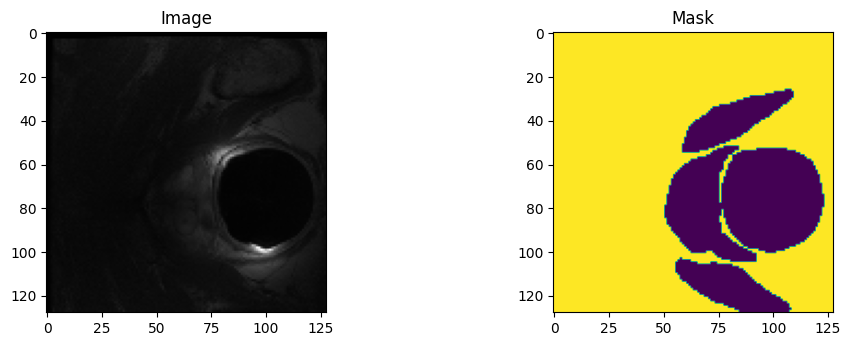

In [10]:
import random

n_slice = random.randint(0, 29)

plt.figure(figsize=(12,8))

plt.subplot(221)
plt.imshow(gambar[:,:,n_slice], cmap='gray')
plt.title('Image')
plt.subplot(222)
plt.imshow(topeng[:,:,n_slice,0],)
plt.title('Mask')
plt.show()

Data Generator


In [11]:
import os
import numpy as np


In [12]:
def load_img(img_dir, img_list):
  images = []
  for i, image_name in enumerate(img_list):
    if (image_name.split('.')[1] == 'npy'):

      image = np.load(img_dir+image_name)

      images.append(image)
  images=np.array(images)

  return(images)

In [13]:
def imageLoader(img_dir, img_list, mask_dir, mask_list, batch_size):

  L = len(img_list)

  while True:

    batch_start = 0
    batch_end = batch_size

    while batch_start < L:
      limit = min(batch_end, L)

      X = load_img(img_dir, img_list[batch_start:limit])
      Y = load_img(mask_dir, mask_list[batch_start:limit])

      yield (X,Y)

      batch_start += batch_size
      batch_end += batch_size

In [14]:
train_img_dir = '/content/drive/MyDrive/Task01_Prostate/saya/images/'
train_mask_dir = '/content/drive/MyDrive/Task01_Prostate/saya/mask/'
train_img_list = os.listdir(train_img_dir)
train_mask_list = os.listdir(train_mask_dir)

In [15]:
batch_size = 2

train_img_datagen = imageLoader(train_img_dir, train_img_list,
                                train_mask_dir, train_mask_list, batch_size)

In [17]:
img, mask = next(train_img_datagen)

In [18]:
img.shape, mask.shape

((2, 128, 128, 32), (2, 128, 128, 32, 9))

Simple 3D Unet

In [19]:
from keras.models import Model
from keras.layers import Input, Conv3D, MaxPooling3D, concatenate, Conv3DTranspose, BatchNormalization, Dropout, Lambda
from keras.optimizers import Adam
from keras.metrics import MeanIoU

kernel_initializer =  'he_uniform' #Try others if you want

In [20]:
def simple_unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS, num_classes):
#Build the model
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS))
    #s = Lambda(lambda x: x / 255)(inputs)   #No need for this if we normalize our inputs beforehand
    s = inputs

    #Contraction path
    c1 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(s)
    c1 = Dropout(0.1)(c1)
    c1 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c1)
    p1 = MaxPooling3D((2, 2, 2))(c1)

    c2 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c2)
    p2 = MaxPooling3D((2, 2, 2))(c2)

    c3 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c3)
    p3 = MaxPooling3D((2, 2, 2))(c3)

    c4 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c4)
    p4 = MaxPooling3D(pool_size=(2, 2, 2))(c4)

    c5 = Conv3D(256, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv3D(256, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c5)

    #Expansive path
    u6 = Conv3DTranspose(128, (2, 2, 2), strides=(2, 2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c6)

    u7 = Conv3DTranspose(64, (2, 2, 2), strides=(2, 2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c7)

    u8 = Conv3DTranspose(32, (2, 2, 2), strides=(2, 2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c8)

    u9 = Conv3DTranspose(16, (2, 2, 2), strides=(2, 2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1])
    c9 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c9)

    outputs = Conv3D(num_classes, (1, 1, 1), activation='softmax')(c9)

    model = Model(inputs=[inputs], outputs=[outputs])
    #compile model outside of this function to make it flexible.
    model.summary()

    return model


In [21]:
model = simple_unet_model(128, 128, 32, 1, 9)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 32, 1)]    0         []                            
                                                                                                  
 conv3d (Conv3D)             (None, 128, 128, 32, 16)     448       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 128, 128, 32, 16)     0         ['conv3d[0][0]']              
                                                                                                  
 conv3d_1 (Conv3D)           (None, 128, 128, 32, 16)     6928      ['dropout[0][0]']             
                                                                                              

Train Model

In [22]:
import os
import numpy as np
#import tensorflow as tf
import keras
from matplotlib import pyplot as plt
import glob
import random

In [23]:
train_img_dir = "/content/drive/MyDrive/Task01_Prostate/saya/train/image/"
train_mask_dir = "/content/drive/MyDrive/Task01_Prostate/saya/train/mask/"

val_img_dir = "/content/drive/MyDrive/Task01_Prostate/saya/val/image/"
val_mask_dir = "/content/drive/MyDrive/Task01_Prostate/saya/val/mask/"

train_img_list=os.listdir(train_img_dir)
train_mask_list = os.listdir(train_mask_dir)

val_img_list=os.listdir(val_img_dir)
val_mask_list = os.listdir(val_mask_dir)

In [24]:
batch_size = 2

train_img_datagen = imageLoader(train_img_dir, train_img_list,
                                train_mask_dir, train_mask_list, batch_size)

val_img_datagen = imageLoader(val_img_dir, val_img_list,
                                val_mask_dir, val_mask_list, batch_size)

In [25]:
img, msk = next(train_img_datagen)

In [26]:
img_num = random.randint(0,img.shape[0]-1)
test_img=img[img_num]
test_mask=msk[img_num]
test_mask=np.argmax(test_mask, axis=3)

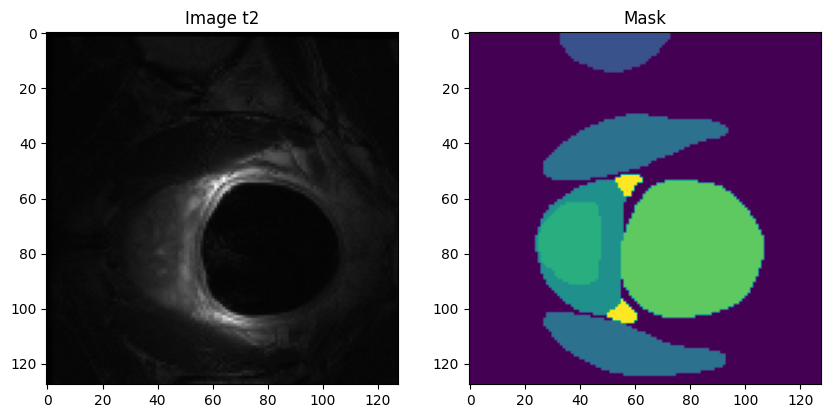

In [27]:
n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(10, 8))

plt.subplot(121)
plt.imshow(test_img[:,:,n_slice], cmap='gray')
plt.title('Image t2')
plt.subplot(122)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [28]:
!pip install segmentation-models-3D


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 kB 8.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.9/489.9 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 97.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.7/479.7 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 64.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [33]:
wt0, wt1, wt2, wt3 = 0.25,0.25,0.25,0.25
import segmentation_models_3D as sm
dice_loss = sm.losses.DiceLoss()
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

metrics = ['accuracy', sm.metrics.IOUScore(threshold=0.5)]

LR = 0.001
optim = keras.optimizers.Adam(LR)

steps_per_epoch = len(train_img_list)//batch_size
val_steps_per_epoch = len(val_img_list)//batch_size

In [34]:
model = simple_unet_model(IMG_HEIGHT=128,
                          IMG_WIDTH=128,
                          IMG_DEPTH=32,
                          IMG_CHANNELS=1,
                          num_classes=9)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 128, 128, 32, 1)]    0         []                            
                                                                                                  
 conv3d_38 (Conv3D)          (None, 128, 128, 32, 16)     448       ['input_3[0][0]']             
                                                                                                  
 dropout_18 (Dropout)        (None, 128, 128, 32, 16)     0         ['conv3d_38[0][0]']           
                                                                                                  
 conv3d_39 (Conv3D)          (None, 128, 128, 32, 16)     6928      ['dropout_18[0][0]']          
                                                                                            

In [35]:
model.compile(optimizer = optim, loss=total_loss, metrics=metrics)
print(model.summary())

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 128, 128, 32, 1)]    0         []                            
                                                                                                  
 conv3d_38 (Conv3D)          (None, 128, 128, 32, 16)     448       ['input_3[0][0]']             
                                                                                                  
 dropout_18 (Dropout)        (None, 128, 128, 32, 16)     0         ['conv3d_38[0][0]']           
                                                                                                  
 conv3d_39 (Conv3D)          (None, 128, 128, 32, 16)     6928      ['dropout_18[0][0]']          
                                                                                            

In [36]:
history=model.fit(train_img_datagen,
          steps_per_epoch=steps_per_epoch,
          epochs=50,
          verbose=1,
          validation_data=val_img_datagen,
          validation_steps=val_steps_per_epoch,
          )

Epoch 1/50


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
6/6 [==============================] - ETA: 0s - loss: 0.9737 - accuracy: 0.6975 - iou_score: 0.0481

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
6/6 [==============================] - 18s 626ms/step - loss: 0.9737 - accuracy: 0.6975 - iou_score: 0.0481 - val_loss: 0.9434 - val_accuracy: 0.8332 - val_iou_score: 0.2036
Epoch 2/50
6/6 [==============================] - 3s 459ms/step - loss: 0.9309 - accuracy: 0.7964 - iou_score: 0.1112 - val_loss: 0.9305 - val_accuracy: 0.8332 - val_iou_score: 0.2303
Epoch 3/50
6/6 [==============================] - 3s 518ms/step - loss: 0.9213 - accuracy: 0.7990 - iou_score: 0.1154 - val_loss: 0.9170 - val_accuracy: 0.7964 - val_iou_score: 0.2456
Epoch 4/50
6/6 [==============================] - 3s 473ms/step - loss: 0.9203 - accuracy: 0.7501 - iou_score: 0.11

In [37]:
model.save('arief_prostate_3d.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  


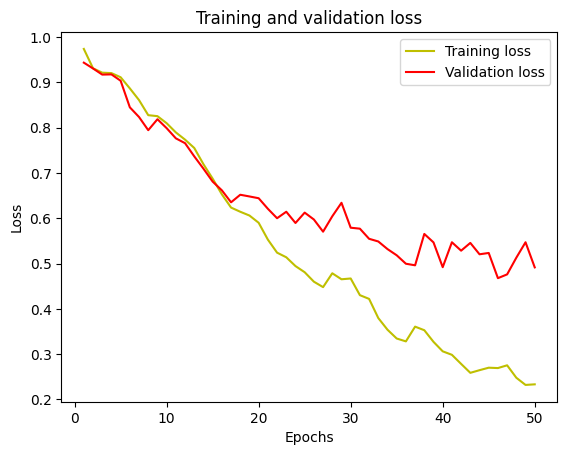

In [38]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

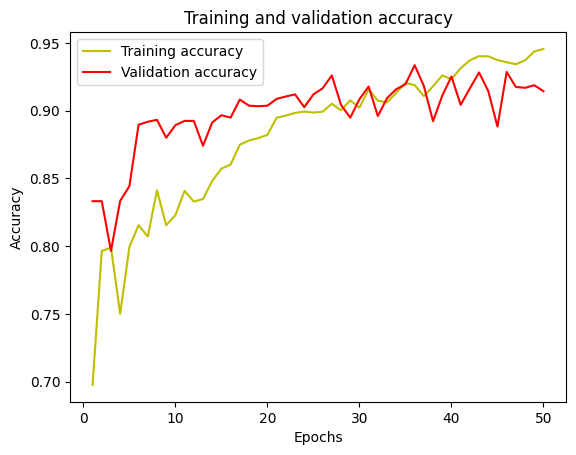

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Load Model and Prediction

In [1]:
from keras.models import load_model

In [3]:
my_model = load_model('/content/drive/MyDrive/arief_prostate_3d.hdf5',
                      compile=False)

In [4]:
from keras.metrics import MeanIoU

batch_size=8 #Check IoU for a batch of images
test_img_datagen = imageLoader(val_img_dir, val_img_list,
                                val_mask_dir, val_mask_list, batch_size)

#Verify generator.... In python 3 next() is renamed as __next__()
test_image_batch, test_mask_batch = test_img_datagen.__next__()

test_mask_batch_argmax = np.argmax(test_mask_batch, axis=4)
test_pred_batch = my_model.predict(test_image_batch)
test_pred_batch_argmax = np.argmax(test_pred_batch, axis=4)

n_classes = 9
IOU_keras = MeanIoU(num_classes=n_classes)
IOU_keras.update_state(test_pred_batch_argmax, test_mask_batch_argmax)
print("Mean IoU =", IOU_keras.result().numpy())

NameError: name 'imageLoader' is not defined

In [44]:
img_num = 7

test_img = np.load("/content/drive/MyDrive/Task01_Prostate/saya/val/image/image_"+str(img_num)+".npy")

test_mask = np.load("/content/drive/MyDrive/Task01_Prostate/saya/val/mask/mask_"+str(img_num)+".npy")
test_mask_argmax=np.argmax(test_mask, axis=3)

test_img_input = np.expand_dims(test_img, axis=0)
test_prediction = my_model.predict(test_img_input)
test_prediction_argmax=np.argmax(test_prediction, axis=4)[0,:,:,:]

1/1 [==============================] - 0s 23ms/step


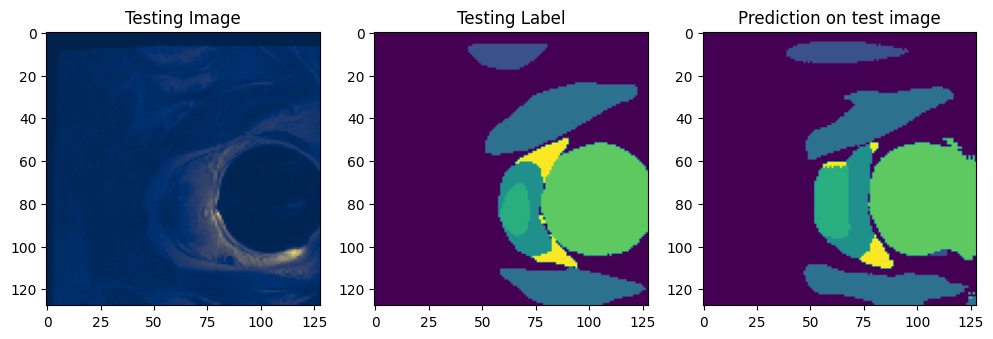

In [57]:
from matplotlib import pyplot as plt
import random

n_slice=random.randint(0, test_prediction_argmax.shape[2])
#n_slice = 5
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,n_slice], cmap='cividis' )
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(test_mask_argmax[:,:,n_slice])
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(test_prediction_argmax[:,:, n_slice])
plt.show()

                ---END---







---



In [35]:
import os

import torch
import numpy as np


os.environ["CUDA_VISIBLE_DEVICES"]="0"
use_cuda = torch.cuda.is_available()
folder_name = '/content/drive/MyDrive/Task01_Prostate/try'
RESULT_PATH = '/content/drive/MyDrive/Task01_Prostate/result'

In [41]:
class UNet(torch.nn.Module):

    def __init__(self, ch_in=9, ch_out=1, init_n_feat=32):
        super(UNet, self).__init__()

        n_feat = init_n_feat
        self.encoder1 = UNet._block(ch_in, n_feat)
        self.pool1 = torch.nn.MaxPool3d(kernel_size=2, stride=2)
        self.encoder2 = UNet._block(n_feat, n_feat*2)
        self.pool2 = torch.nn.MaxPool3d(kernel_size=2, stride=2)
        self.encoder3 = UNet._block(n_feat*2, n_feat*4)
        self.pool3 = torch.nn.MaxPool3d(kernel_size=2, stride=2)


        self.bottleneck = UNet._block(n_feat*8, n_feat*16)


        self.upconv3 = torch.nn.ConvTranspose3d(n_feat*8, n_feat*4, kernel_size=2, stride=2)
        self.decoder3 = UNet._block((n_feat*4)*2, n_feat*4)
        self.upconv2 = torch.nn.ConvTranspose3d(n_feat*4, n_feat*2, kernel_size=2, stride=2)
        self.decoder2 = UNet._block((n_feat*2)*2, n_feat*2)
        self.upconv1 = torch.nn.ConvTranspose3d(n_feat*2, n_feat, kernel_size=2, stride=2)
        self.decoder1 = UNet._block(n_feat*2, n_feat)

        self.conv = torch.nn.Conv3d(in_channels=n_feat, out_channels=ch_out, kernel_size=1)

    def forward(self, x):
        enc1 = self.encoder1(x)
        enc2 = self.encoder2(self.pool1(enc1))
        enc3 = self.encoder3(self.pool2(enc2))


        bottleneck = self.bottleneck(self.pool3(enc3))



        dec3 = torch.cat((dec3, enc3), dim=1)
        dec3 = self.decoder3(dec3)
        dec2 = self.upconv2(dec3)
        dec2 = torch.cat((dec2, enc2), dim=1)
        dec2 = self.decoder2(dec2)
        dec1 = self.upconv1(dec2)
        dec1 = torch.cat((dec1, enc1), dim=1)
        dec1 = self.decoder1(dec1)
        return torch.sigmoid(self.conv(dec1))

    @staticmethod
    def _block(ch_in, n_feat):
        return torch.nn.Sequential(
            torch.nn.Conv3d(in_channels=ch_in, out_channels=n_feat, kernel_size=3, padding=1, bias=False),
            torch.nn.BatchNorm3d(num_features=n_feat),
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv3d(in_channels=n_feat, out_channels=n_feat, kernel_size=3, padding=1, bias=False),
            torch.nn.BatchNorm3d(num_features=n_feat),
            torch.nn.ReLU(inplace=True))


## loss function
def loss_dice(y_pred, y_true, eps=1e-6):
    '''
    y_pred, y_true -> [N, C=1, D, H, W]
    '''
    numerator = torch.sum(y_true*y_pred, dim=(2,3,4)) * 2
    denominator = torch.sum(y_true, dim=(2,3,4)) + torch.sum(y_pred, dim=(2,3,4)) + eps
    return torch.mean(1. - (numerator / denominator))


In [42]:
class NPyDataset(torch.utils.data.Dataset):
    def __init__(self, folder_name, is_train=True):
        self.folder_name = folder_name
        self.is_train = is_train

    def __len__(self):
        return (10 if self.is_train else 5)

    def __getitem__(self, idx):
        if self.is_train:
            image = self._load_npy("images/image_%1d.npy" % idx)
            label = self._load_npy("mask/mask_%1d.npy" % idx)
            return image, label
        else:
            return self._load_npy("image_test%02d.npy" % idx), idx

    def _load_npy(self, filename):
        filename = os.path.join(self.folder_name, filename)
        return torch.unsqueeze(torch.tensor(np.float32(np.load(filename)[::2,::2,::2])),dim=-1)

In [25]:
import os
import numpy as np

In [26]:
def load_img(img_dir, img_list):
  images = []
  for i, image_name in enumerate(img_list):
    if (image_name.split('.')[1] == 'npy'):

      image = np.load(img_dir+image_name)

      images.append(image)
  images=np.array(images)

  return(images)

def imageLoader(img_dir, img_list, mask_dir, mask_list, batch_size):

  L = len(img_list)

  while True:

    batch_start = 0
    batch_end = batch_size

    while batch_start < L:
      limit = min(batch_end, L)

      X = load_img(img_dir, img_list[batch_start:limit])
      Y = load_img(mask_dir, mask_list[batch_start:limit])

      yield (X,Y)

      batch_start += batch_size
      batch_end += batch_size

In [27]:
train_img_dir = '/content/drive/MyDrive/Task01_Prostate/try/images/'
train_mask_dir = '/content/drive/MyDrive/Task01_Prostate/try/mask/'
train_img_list = os.listdir(train_img_dir)
train_mask_list = os.listdir(train_mask_dir)

In [28]:
batch_size = 2

In [29]:
train_img_datagen = imageLoader(train_img_dir, train_img_list,
                                train_mask_dir, train_mask_list, batch_size)

In [30]:
img, mask = next(train_img_datagen)
print(img.shape)
print(mask.shape)


(2, 128, 128, 30)
(2, 128, 128, 30, 9)


In [31]:
import tensorflow as tf

img2= tf.expand_dims(img, axis=-1)

In [32]:
print(img2.shape)


(2, 128, 128, 30, 1)


In [43]:
model = UNet(9,1)  # input 1-channel 3d volume and output 1-channel segmentation (a probability map)
if use_cuda:
    model.cuda()

In [44]:
train_set = NPyDataset(folder_name)
train_loader = torch.utils.data.DataLoader(
    train_set,
    batch_size=2,
    shuffle=True,
    num_workers=4)
'''test
dataiter = iter(train_loader)
images, labels = dataiter.next()
preds = model(images)
'''


'test\ndataiter = iter(train_loader)\nimages, labels = dataiter.next()\npreds = model(images)\n'

In [45]:
freq_print = 100  # in steps
freq_test = 2000  # in steps
total_steps = int(2e5)
step = 0
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
while step < total_steps:
    for ii, (images, labels) in enumerate(train_loader):
        step += 1
        if use_cuda:
            images, labels = images.cuda(), labels.cuda()

        optimizer.zero_grad()
        preds = model(images)
        loss = loss_dice(preds, labels)
        loss.backward()
        optimizer.step()

        # Compute and print loss
        if (step % freq_print) == 0:    # print every freq_print mini-batches
            print('Step %d loss: %.5f' % (step,loss.item()))

        # --- testing during training (no validation labels available)
        if (step % freq_test) == 0:
            images_test, id_test = iter(test_loader).next()  # test one mini-batch
            if use_cuda:
                images_test = images_test.cuda()
            preds_test = model(images_test)
            for idx, index in enumerate(id_test):
                filepath_to_save = os.path.join(RESULT_PATH,"label_test%02d_step%06d-pt.npy" % (index,step))
                np.save(filepath_to_save, preds_test.detach()[idx,...].cpu().numpy().squeeze())
                print('Test data saved: {}'.format(filepath_to_save))

print('Training done.')



RuntimeError: Given groups=1, weight of size [32, 9, 3, 3, 3], expected input[2, 64, 64, 15, 1] to have 9 channels, but got 64 channels instead